In [19]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [25]:
#Download NLTK resources:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...


True

In [2]:
#label columns and load data
#does it matter what I use for encoding?

cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", header=None, names=cols)

In [3]:
#explore the first few rows of the dataset  

df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
#checking info, there are no null values in this dataset 

df.info()

#there are no null values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
# drop unnecessary columns

df = df.drop(columns=["id", "date", "query_string", "user"])

In [6]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
#checking distribution of sentiment values

df.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

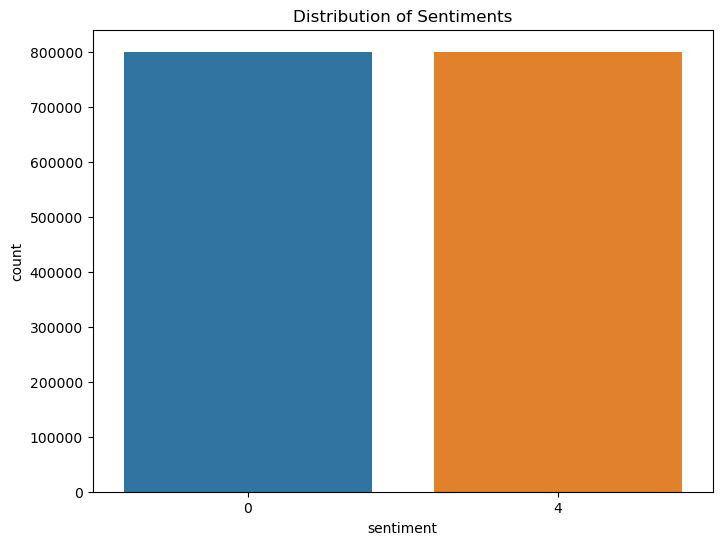

In [8]:
# explore the distribution of sentiments

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [9]:
#creating a new feature with the character length of each text

df['text_len'] = [len(t) for t in df.text]

In [10]:
df.head()

,sentiment,text,text_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


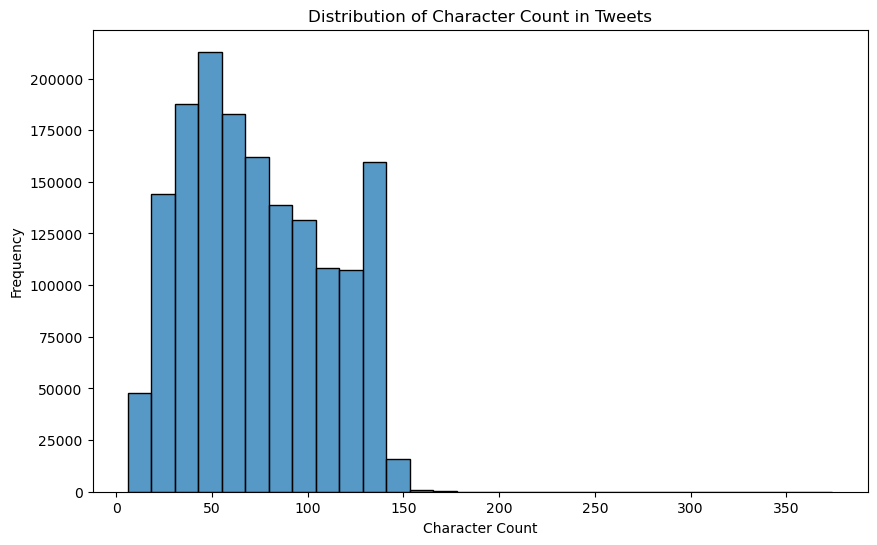

In [11]:
#exploring the distribution of character count 

plt.figure(figsize=(10, 6))
sns.histplot(df['text_len'], bins=30, kde=False)
plt.title('Distribution of Character Count in Tweets')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

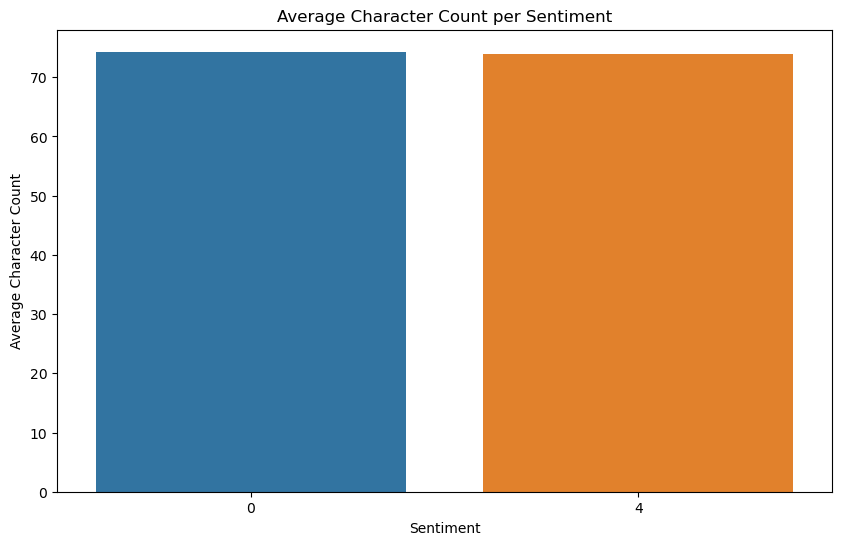

In [12]:
# Display average character count per sentiment

avg_char_count_by_sentiment = df.groupby('sentiment')['text_len'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='text_len', data=avg_char_count_by_sentiment)
plt.title('Average Character Count per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Character Count')
plt.show()


In [13]:
avg_char_count_by_sentiment

#average character length is slightly higher for negative sentiment

,sentiment,text_len
0,0,74.301790
1,4,73.878433


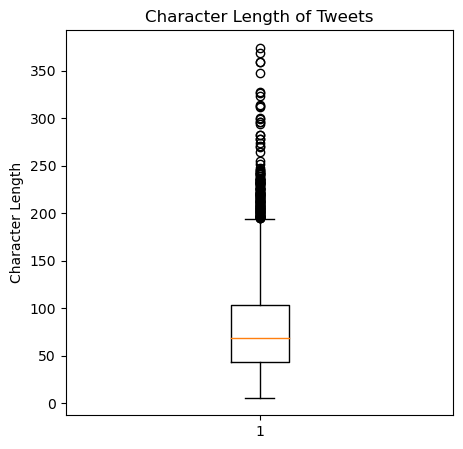

In [14]:
#plot character length of tweets

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.text_len)
plt.title('Character Length of Tweets')
plt.ylabel('Character Length')
plt.show()

In [15]:
#Twitter has a character limit of 140, so why are there so many tweets that contain more than 140 characters?

df[df.text_len > 140].head()

,sentiment,text,text_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144


In [16]:
#check out a few tweets and why they exceed the character limit

df.text[213]

"Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie "

In [17]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [18]:
df.text[400]

"#3 woke up and was having an accident - &quot;It's pushing, it's pushing!&quot; he was crying because he couldn't stop from wetting his pants.  "

In [22]:
#Initialize stemmer, lemmatizer, and stopwords:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [23]:
#Define the data cleaning function
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion and removal of non-alphabetic characters
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join tokens back into a single string
    clean_text = ' '.join(tokens)
    
    return clean_text

In [26]:
#Apply data cleaning function to the dataframe
df['cleaned_text'] = df['text'].apply(clean_text)

In [27]:
df.cleaned_text[343]

'theleaguesf fun amp furiou new mantra bay breaker get rambuncti citi overreact amp clamp'

In [28]:
df.cleaned_text[213]

'awwh bab look sad underneith shop entranc quot yesterday musik quot like look new transform movi'

In [29]:
df.cleaned_text[400]

'woke accid quot push push quot cri could stop wet pant'